# Итоговая работа по курсу "Python для анализа данных"

## Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:  
1. **satisfaction_level** - Уровень удовлетворенности работой
2. **Last_evaluation** - Время с момента последней оценки в годах
3. **number_projects** - Количество проектов, выполненных за время работы
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
5. **time_spend_company** - Стаж работы в компании в годах
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. **left** - уволился ли сотрудник
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет
9. **department** - отдел в котором работает сотрудник
10. **salary** - относительный уровень зарплаты  

Требуется выполнить следующее задание:

1. Загрузите файл HR.csv в pandas dataframe
2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.  
Определите две самые скоррелированные и две наименее скоррелированные переменные.
4. Рассчитайте сколько сотрудников работает в каждомдепартаменте.
5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности. 
7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.
8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
    - Доля сотрудников с повышением за последние 5 лет
    - Средняя степень удовлетворенности
    - Среднее количество проектов
9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки.
10. Загрузить jupyter notebook с решением на github и прислать ссылку.

<TOC>

### 1. Загрузите файл HR.csv в pandas dataframe

In [2]:
# Импортируем нужные нам библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('HR.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


видим что пропусков нет, предорабатывать данные не нужно

добавим столбец int_salary в котором в виде чилел запишем уровень ЗП, для этого используем метод .map

In [5]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [6]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [4]:
# для этого используем метод .map
d = {'low':1,'medium':2,'high':3}
df['int_salary'] = df['salary'].map(d)
df[['salary', 'int_salary']].sample(10)

,salary,int_salary
13555,low,1
5359,medium,2
3339,high,3
747,low,1
5673,high,3
3331,low,1
11982,medium,2
2437,low,1
6990,high,3
7814,low,1


### 2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [8]:
# основные статистики можно получить методом describe (50% квантиль - это тоже что медиана)
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,int_salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
# рассчитаем моду (наиболее часто встречающееся значение) для каждого столбца:
print('Мода для столбцов: \n')
for col in df.columns:
    try:
        print(col, '-', df[col].mode()[0])
    except:
        print(f'{col} - Для этого столбца нельзя вычислить значение')

Мода для столбцов: 

satisfaction_level - 0.1
last_evaluation - 0.55
number_project - 4
average_montly_hours - 135
time_spend_company - 3
Work_accident - 0
left - 0
promotion_last_5years - 0
department - sales
salary - low
int_salary - 1


In [10]:
# также можно рассчитать медиану:
print('Медиана для столбцов: \n')
for col in df.columns:
    try:
        print(col, '-', df[col].median())
    except:
        print(f'{col} - Для этого столбца нельзя вычислить значение')

Медиана для столбцов: 

satisfaction_level - 0.64
last_evaluation - 0.72
number_project - 4.0
average_montly_hours - 200.0
time_spend_company - 3.0
Work_accident - 0.0
left - 0.0
promotion_last_5years - 0.0
department - Для этого столбца нельзя вычислить значение
salary - Для этого столбца нельзя вычислить значение
int_salary - 2.0


In [11]:
# и для примера рассчиатем статистики НЕ через describe, для столбца satisfaction_level к примеру
print('Минимум -', df['satisfaction_level'].min())
print('Максимум -', df['satisfaction_level'].max())
print('Среднее арифм. -', df['satisfaction_level'].mean())
print('Мода -', df['satisfaction_level'].mode()[0])
print('Медиана -', df['satisfaction_level'].median())
print('Среднеквадратическое отклонение -', df['satisfaction_level'].std())
print('Дисперсия -', df['satisfaction_level'].var())

Минимум - 0.09
Максимум - 1.0
Среднее арифм. - 0.6128335222348166
Мода - 0.1
Медиана - 0.64
Среднеквадратическое отклонение - 0.2486306510611418
Дисперсия - 0.061817200647087255


## 3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,int_salary
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [13]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary', 'int_salary'],
      dtype='object')

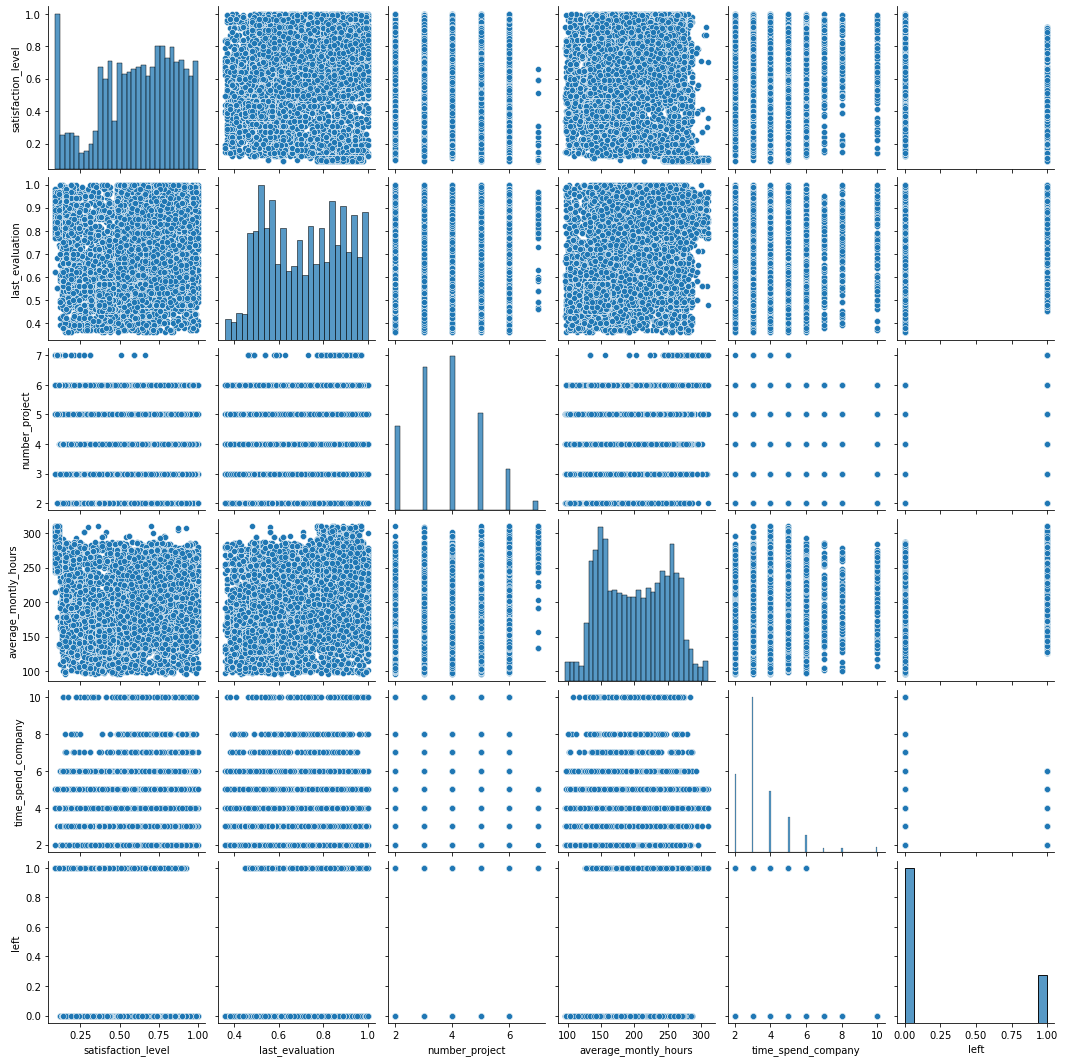

In [14]:
sns.pairplot(df, vars=(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'left']))

Из данной визуализации каких-то очевидный корреляций не видно, посмотрим на таблицу

In [15]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,int_salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
int_salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


а еще лучше на тепловую карту

<AxesSubplot:>

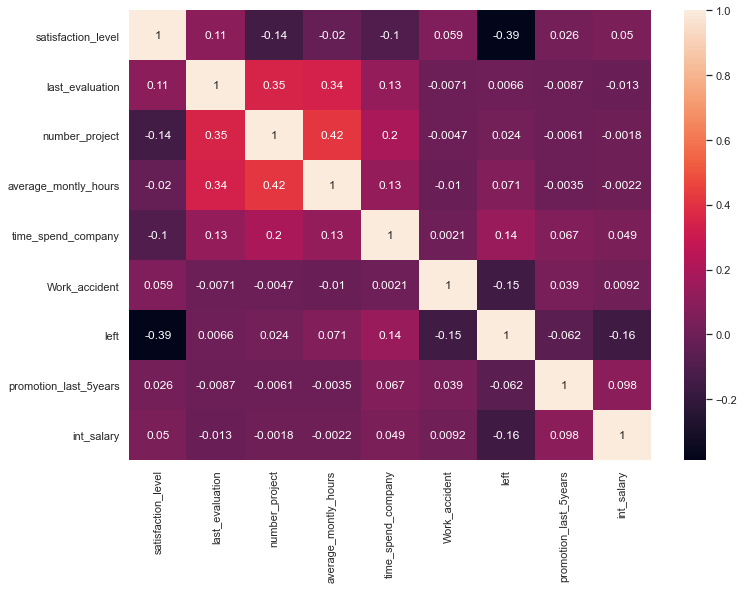

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), annot=True)

Видно что корреляция слабая (вернее её можно сказать нет) почти между всеми параметрами, выделить можно лишь связь между average_montly_hours (Среднее количество часов на рабочем месте в месяц) и number_project (Количество проектов, выполненных за время работы), т.е. чем больше человек работает, тем больше он сделал проектов - логично, но все равно корреляция довольно слабая - 0.42.  
Также видим отрицательную корреляцию между satisfaction_level (Уровень удовлетворенности работой) и Left - увольнение сотрудника, чем ниже удовлетворенность - тем больше вероятность его увольнения, относительно конечно, абсолют коррелиция 0.39.  P.s. параметр Last_evaluation я бы в расчет не брал, т.к. как я понимаю - это довольно рандомная величина, т.е. она логически не связана с другими.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='average_montly_hours', ylabel='number_project'>

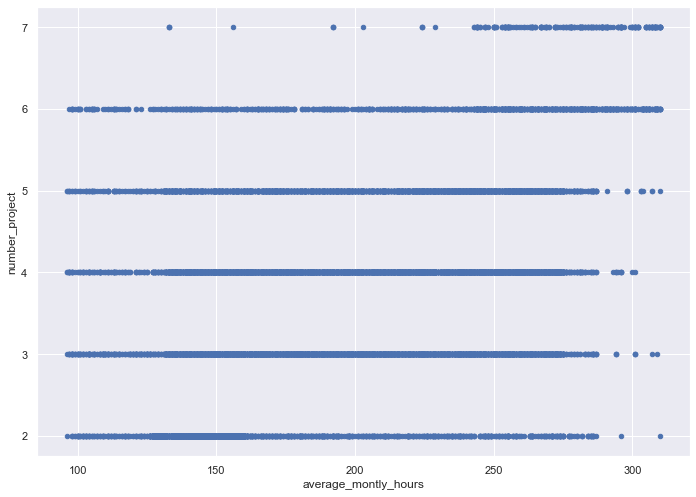

In [17]:
# визуализируем корреляцию между satisfaction_level и number_project
df.plot(kind='scatter', x='average_montly_hours', y='number_project')

Не очень наглядно, но корреляцию видно

Сделаем такую же визуализацию, но не на всей выборке, а, например для 300 сотрудников

In [18]:
df_sample = df.sample(300)
df_sample.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,int_salary
10904,0.58,0.86,4,168,2,0,0,0,product_mng,medium,2
4462,0.65,0.86,4,269,2,1,0,0,hr,medium,2
11851,0.20,0.78,4,196,3,0,0,0,management,low,1
9192,0.40,0.42,3,146,2,1,0,0,hr,medium,2
13560,0.95,0.90,4,221,10,1,0,0,management,high,3


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='average_montly_hours', ylabel='number_project'>

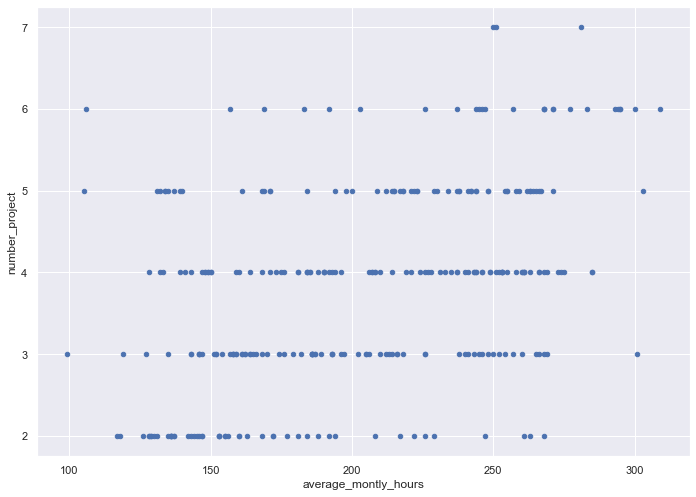

In [19]:
df_sample.plot(kind='scatter', x='average_montly_hours', y='number_project')

## 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [20]:
# посмотрим, какие отделы у нас вообще есть
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [21]:
# самый простой способ - это через value_counts
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [22]:
df['department'].value_counts().values[1]

2720

In [23]:
# Также можно получить это в цикле применяя название отдела в качестве фильтра и считая кол-во строк (сотрудников)
for dep in df['department'].unique():
    n = df[df['department'] == dep].count()[0] # тут получаем кол-во сотрудников в отделе
    print(f'В отделе {dep} работает {n} сотрудников')

В отделе sales работает 4140 сотрудников
В отделе accounting работает 767 сотрудников
В отделе hr работает 739 сотрудников
В отделе technical работает 2720 сотрудников
В отделе support работает 2229 сотрудников
В отделе management работает 630 сотрудников
В отделе IT работает 1227 сотрудников
В отделе product_mng работает 902 сотрудников
В отделе marketing работает 858 сотрудников
В отделе RandD работает 787 сотрудников


In [24]:
# или также в цикле создать словарь, где ключем будет отдел, значением - кол-во сотрудников
size_dep = {}
for dep in df['department'].unique():
    n = df[df['department'] == dep].count()[0] # тут получаем кол-во сотрудников в отделе
    size_dep[dep] = n

In [25]:
size_dep

{'sales': 4140,
 'accounting': 767,
 'hr': 739,
 'technical': 2720,
 'support': 2229,
 'management': 630,
 'IT': 1227,
 'product_mng': 902,
 'marketing': 858,
 'RandD': 787}

## 5. Показать распределение сотрудников по зарплатам.

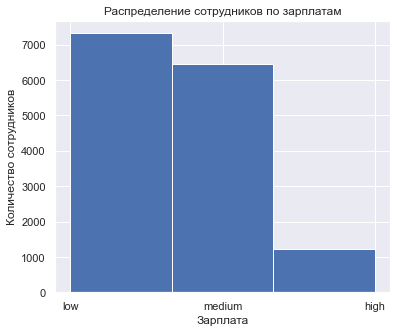

In [43]:
plt.figure(figsize=(6, 5))
plt.hist(df['salary'], 3)
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам')
plt.grid(True)

## 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [44]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,int_salary
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [48]:
depatments_salary = df.pivot_table(
                        index='department', 
                        columns='salary', 
                        values='left', 
                        aggfunc='count')
depatments_salary

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


Text(0.5, 1.0, 'Распределение сотрудников по зарплатам в каждом департаменте')

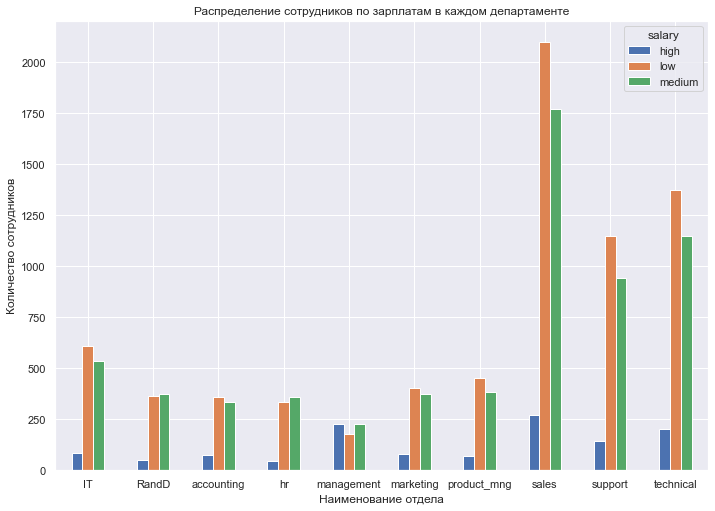

In [65]:
depatments_salary.plot(kind='bar', rot=0)
plt.xlabel('Наименование отдела')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')

## 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Никакие экспериментально полученные данные никогда **не подтвердят** какую-либо гипотезу. Это является фундаментальным ограничением. Данные могут лишь не противоречить гипотезе или, наоборот, показывать очень маловероятные результаты (при условии, что гипотеза верна). Но и в том, и в другом случае никогда нет оснований утверждать, что выдвинутая гипотеза **доказана**.

H0 - нулевая гипотеза - нет связи между окладом и проводимым временем на работе (сотрудники с высоким окладом работают одинаково).  
H1 - сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [1]:
import scipy.stats as sts

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,int_salary
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [29]:
# создадим выборки сотрудников с высоким и низким окладом
df_high = df[df['salary'] == 'high']
df_high.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,int_salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high,3
111,0.09,0.85,6,289,4,0,1,0,hr,high,3
189,0.44,0.51,2,156,3,0,1,0,technical,high,3
267,0.45,0.53,2,129,3,0,1,0,technical,high,3
306,0.37,0.46,2,149,3,0,1,0,marketing,high,3


In [30]:
df_low = df[df['salary'] == 'low']
df_low.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,int_salary
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1
5,0.41,0.50,2,153,3,0,1,0,sales,low,1
6,0.10,0.77,6,247,4,0,1,0,sales,low,1


Здесь нам нужен двухвыборочный двухсторонний критерий.  
Существует [мнение](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html), что использование критерия Уэлча всегда предпочтительнее, будем придерживаться этой позиции.

In [40]:
alpha = 0.05
result = sts.ttest_ind(df_high['average_montly_hours'], df_low['average_montly_hours'], equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, сотрудники с низкой и высокой ЗП работают разное время')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу


Т.е. мы **не можем утверждать** что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [33]:
#Посмотрим числовые значения средних для этих выборок
print(df_high['average_montly_hours'].mean())
print(df_low['average_montly_hours'].mean())

199.86742118027485
200.9965828321487


Видим, что средние значения, действительно очень близко.

## 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [142]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [141]:
df_left = df[df['left'] == 1]
len(df_left)

3571

In [143]:
df_working = df[df['left'] == 0]
len(df_working)

11428

In [145]:
# Доля сотрудников с повышением за последние 5 лет
print('Общее число сотрудников:', len(df['promotion_last_5years']))
print('Число сотрудников с  повышением за последние 5 лет:', len(df[df['promotion_last_5years'] == 1]))
print('Доля сотрудников с повышением:', round(len(df[df['promotion_last_5years'] == 1]) / len(df['promotion_last_5years']), 2))

Общее число сотрудников: 14999
Число сотрудников с  повышением за последние 5 лет: 319
Доля сотрудников с повышением: 0.02


In [152]:
# Доля сотрудников с повышением за последние 5 лет (среди уволившихся)
round( len(df[(df['left'] == 1) & (df['promotion_last_5years'] == 1)]) /
      len(df[df['left'] == 1]), 2)

0.01

In [153]:
# Доля сотрудников с повышением за последние 5 лет (среди работающих)
round( len(df[(df['left'] == 0) & (df['promotion_last_5years'] == 1)]) /
      len(df[df['left'] == 0]), 2)

0.03

In [181]:
# Средняя степень удовлетворенности
print('Средняя степень удовлетворенности (общая):', df['satisfaction_level'].mean())
print('Средняя степень удовлетворенности (среди уволившихся):', df['satisfaction_level'].loc[df['left'] == 1].mean())
print('Средняя степень удовлетворенности (среди работающих):', df['satisfaction_level'].loc[df['left'] == 0].mean())

Средняя степень удовлетворенности (общая): 0.6128335222348166
Средняя степень удовлетворенности (среди уволившихся): 0.44009801176140917
Средняя степень удовлетворенности (среди работающих): 0.666809590479516


In [182]:
# Среднее количество проектов
print('Среднее количество проектов (общее):', df['number_project'].mean())
print('Среднее количество проектов (среди уволившихся):', df['number_project'].loc[df['left'] == 1].mean())
print('Среднее количество проектов (среди работающих):', df['number_project'].loc[df['left'] == 0].mean())

Среднее количество проектов (общее): 3.80305353690246
Среднее количество проектов (среди уволившихся): 3.8555026603192384
Среднее количество проектов (среди работающих): 3.786664333216661


## 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [100]:
# оставим нужные нам признаки
df_attribute = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'int_salary']]
df_attribute.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,int_salary
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,2
2,0.11,0.88,7,272,4,0,0,2
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1


In [101]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_attribute, df['left'], test_size=0.25)

In [121]:
len(y_test)

3750

In [102]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [103]:
lda = LinearDiscriminantAnalysis()

In [104]:
# обучаем модель
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [120]:
# делаем прогноз на тестовой выборке
lda.predict(X_test).shape

(3750,)

In [119]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.sample(20)

,left,Unnamed 0
4213,0.0,NaN
92,1.0,0.0
10507,0.0,NaN
1942,1.0,0.0
12926,0.0,NaN
1179,1.0,0.0
4013,0.0,NaN
5324,0.0,NaN
44,1.0,1.0
5440,0.0,NaN


Не очень понимаю, почему тут некоторые предсказания идут как NaN

In [110]:
# оцениваем точность модели
from sklearn.metrics import accuracy_score

In [126]:
accuracy_score(y_test, lda.predict(X_test))

0.7861333333333334

Ну так себе точность, 78.5%

In [122]:
lda.coef_

array([[-4.44737292,  0.63667675, -0.23984709,  0.0044796 ,  0.23401654,
        -1.1038647 , -0.7866852 , -0.68004823]])

## 10. Загрузить jupyter notebook с решение на github и прислать ссылку